initial route ('A',)
initial route length 1
initial route cost 0.0
IN H
actions
visited ['A']
unvisited ['D', 'E', 'G', 'N', 'R', 'T', 'V']
{('A', 'T'), ('A', 'R'), ('A', 'N'), ('A', 'G'), ('A', 'E'), ('A', 'V'), ('A', 'D')}
In action_cost
('A',)
('A', 'T')
('A', 'T')
166.5893153836704
------
IN H
In action_cost
('A',)
('A', 'R')
('A', 'R')
346.56024007378574
------
IN H
In action_cost
('A',)
('A', 'N')
('A', 'N')
674.2610770317385
------
IN H
In action_cost
('A',)
('A', 'G')
('A', 'G')
755.9470880954566
------
IN H
In action_cost
('A',)
('A', 'E')
('A', 'E')
1046.0076481555955
------
IN H
In action_cost
('A',)
('A', 'V')
('A', 'V')
919.2540454085585
------
IN H
In action_cost
('A',)
('A', 'D')
('A', 'D')
435.69255215117
------
IN H
actions
visited ['A', 'T']
unvisited ['D', 'E', 'G', 'N', 'R', 'V']
{('A', 'T', 'V'), ('A', 'T', 'D'), ('A', 'T', 'R'), ('A', 'T', 'N'), ('A', 'T', 'G'), ('A', 'T', 'E')}
In action_cost
('A', 'T')
('A', 'T', 'V')
('A', 'T', 'V')
998.7560801511131
------
IN 

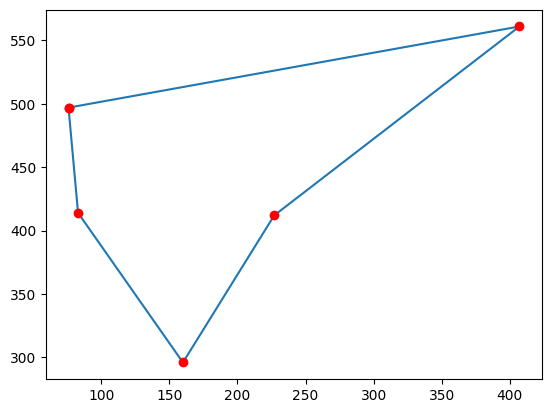

In [50]:
from search_2 import *
import numpy as np
import matplotlib.pyplot as plt

romania = {'A': ( 76, 497), 'D': (160, 296),
           'E': (558, 294), 'G': (368, 257),
           'N': (407, 561), 'R': (227, 412),
           'T': ( 83, 414), 'V': (535, 473)}

distances = {}
cities = []

# fill out distances
for city in romania.keys():
    distances[city] = {}
    cities.append(city)

for name_1, coordinates_1 in romania.items():
        for name_2, coordinates_2 in romania.items():
            distances[name_1][name_2] = np.linalg.norm(
                [coordinates_1[0] - coordinates_2[0], coordinates_1[1] - coordinates_2[1]])
            distances[name_2][name_1] = np.linalg.norm(
                [coordinates_1[0] - coordinates_2[0], coordinates_1[1] - coordinates_2[1]])

def cost(route):
    c = 0
    for i in range(len(route)-1):
        c += distances[route[i]][route[i+1]]
    c += distances[route[0]][route[-1]]
    return c


class TSP(Problem):
    
    def is_goal(self, state):
        return len(state) == 5
    
    def actions(self, state): 
        """The places neighboring `state`."""
        print("actions")
        visited = list(state)
        unvisited = [x for x in cities if x not in visited]
        print("visited", visited)
        print("unvisited", unvisited)
        new_states = set()
        for i in unvisited:
            new_state = state
            new_state = new_state + (i,)
            new_states.add(new_state)
        print(new_states)
        return new_states
        
    def result(self, state, action):
        """Go to the `action` place, if the map says that is possible."""
        return action
    
    def action_cost(self, s, action, s1):
        """The distance (cost) to go from s to s1."""
        print("In action_cost")
        print(s)
        print(action)
        print(s1)
        print(cost(action))
        print("------")
        return cost(action)

    def h(self, n):
        print("IN H")
        return 0


initial_route = tuple('A')

print("initial route", initial_route)
print("initial route length", len(initial_route))
print("initial route cost", cost(initial_route))

r0 = TSP(initial = initial_route)
path = path_states(astar_search(r0)) 
print(path)
print("PATH COST", cost(path[-1]))

data = []
for p in path[-1]:
    data.append(romania[p])
data.append(data[0])

x_val = [x[0] for x in data]
y_val = [x[1] for x in data]

plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'or')
plt.show()